## Fine-tune MobileNet on cats and dogs

### Image preparation

In [3]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path = 'cats-and-dogs/test'

In [75]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


### Modify Model

In [76]:
mobile = keras.applications.mobilenet.MobileNet()

In [6]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [77]:
x = mobile.layers[-6].output
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [78]:
for layer in model.layers[:-5]:
    layer.trainable = False

### Train the model

In [79]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=2, epochs=30, verbose=2)

Epoch 1/30
 - 4s - loss: 0.7719 - acc: 0.5750 - val_loss: 0.6742 - val_acc: 0.5000
Epoch 2/30
 - 4s - loss: 0.2564 - acc: 0.9000 - val_loss: 0.6255 - val_acc: 0.6250
Epoch 3/30
 - 4s - loss: 0.0817 - acc: 0.9750 - val_loss: 0.6007 - val_acc: 0.6250
Epoch 4/30
 - 7s - loss: 0.0612 - acc: 0.9750 - val_loss: 0.5473 - val_acc: 0.6250
Epoch 5/30
 - 5s - loss: 0.0455 - acc: 1.0000 - val_loss: 0.4867 - val_acc: 0.7500
Epoch 6/30
 - 5s - loss: 0.0343 - acc: 1.0000 - val_loss: 0.4186 - val_acc: 0.7500
Epoch 7/30
 - 4s - loss: 0.0062 - acc: 1.0000 - val_loss: 0.3635 - val_acc: 0.7500
Epoch 8/30
 - 4s - loss: 0.0119 - acc: 1.0000 - val_loss: 0.3188 - val_acc: 0.8125
Epoch 9/30
 - 4s - loss: 0.0182 - acc: 1.0000 - val_loss: 0.2813 - val_acc: 0.8125
Epoch 10/30
 - 4s - loss: 0.0463 - acc: 0.9750 - val_loss: 0.2429 - val_acc: 0.8125
Epoch 11/30
 - 5s - loss: 0.0087 - acc: 1.0000 - val_loss: 0.2160 - val_acc: 0.9375
Epoch 12/30
 - 5s - loss: 0.0092 - acc: 1.0000 - val_loss: 0.1966 - val_acc: 0.9375
E

### Predict cats and dogs

In [83]:
test_labels = test_batches.classes

In [84]:
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [85]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [86]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [88]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [89]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[5 0]
 [0 5]]


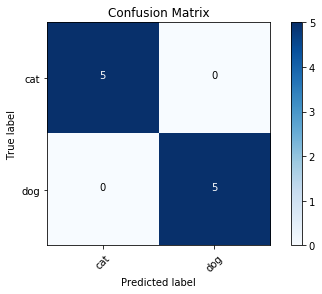

In [90]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')